# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Tirtanusa Kurnia Adhi Perdana
- **Email:** m179d4ky2736@bangkit.academy
- **ID Dicoding:** tirtanusa_ku

## Menentukan Pertanyaan Bisnis

- What is the Top 5 Revenue-Generating city?
- What is the Top 5 Most Popular Category in those city?
- What is the frequencies of transaction per Month?
- What is the most popular payment method?

## Import Semua Packages/Library yang Digunakan

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [191]:
#Importing raw dataset
payment = "Dataset/order_payments_dataset.csv"
order_items = "Dataset/order_items_dataset.csv"
order = "Dataset/orders_dataset.csv"
product = "Dataset/products_dataset.csv"
customers = "Dataset/customers_dataset.csv"
category_translation = "Dataset/product_category_name_translation.csv"

In [192]:
#Reading the csv file
payment_df = pd.read_csv(payment)
order_items_df = pd.read_csv(order_items)
order_df = pd.read_csv(order)
product_df = pd.read_csv(product)
category_translation_df = pd.read_csv(category_translation)
customers_df = pd.read_csv(customers)

In [193]:
payment_df.head(5) #Showing first 5 rows on the database

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [194]:
payment_df.describe() 

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [195]:
order_items_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [196]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [197]:
order_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [198]:
product_df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Assessing Data

payment_df

In [199]:
payment_df.info() #checking dataset info for Data types for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [200]:
print(payment_df.isna().sum()) #Checking if theres any NaN values in the dataset
print("Duplicates : ", payment_df.duplicated().sum()) #Checking any duplicates in the dataset

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
Duplicates :  0


order_items_df

In [201]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [202]:
print(order_items_df.isna().sum())
print("Duplicates : ", order_items_df.duplicated().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Duplicates :  0


In [203]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [204]:
print(order_df.isna().sum())
print("Duplicates : ", order_df.duplicated().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
Duplicates :  0


In [205]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [206]:
print(product_df.isna().sum())
print("Duplicates : ", product_df.duplicated().sum())

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
Duplicates :  0


In [207]:
category_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [208]:
print(category_translation_df.isna().sum())
print("Duplicates : ", category_translation_df.duplicated().sum())

product_category_name            0
product_category_name_english    0
dtype: int64
Duplicates :  0


In [209]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [210]:
print(customers_df.isna().sum())
print("Duplicates : ", customers_df.duplicated().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Duplicates :  0


### Cleaning Data

#### ORDER_DF

In [211]:
#Handling NaN items
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Column number 5-7 have the object type, so i think best to change it to the appropriate data type, which is datetime

In [212]:
#Changing data type to the appropriate data type
change_column = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for x in change_column:
    order_df[x] = pd.to_datetime(order_df[x]) #changing data types to datetime
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [213]:
order_df[order_df.order_approved_at.isna()] # Looking at the NaT value in order_approved

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [214]:
order_df = order_df[order_df.order_status == "delivered"] #Filtering order_status to only delivered
order_df.order_status.value_counts() #Picking only with delivered status

order_status
delivered    96478
Name: count, dtype: int64

In [215]:
order_df.isna().sum() #checking the missing value after filtering

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [216]:
order_df[order_df.order_approved_at.isna()] # looking at the missing value

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


In [217]:
order_df[order_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


In [218]:
#Removing the missing value
order_df.dropna(inplace=True)

order_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### PRODUCT_DF

In [219]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [220]:
product_df[product_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [221]:
product_df[product_df.product_description_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [222]:
product_df.dropna(inplace=True) #Dropping the NaN value because we need the category name to be there
product_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [223]:
product_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


## Exploratory Data Analysis (EDA)

### Explore ...

#### CUSTOMERS_DF

In [224]:
customers_df.describe(include ="all") 

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [225]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False) #Checking the cities from the most to the least number of transaction

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [226]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False) #sorting based on State

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [227]:
customers_df.customer_city.value_counts().head(10) #Top 10 City for Transaction

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64

In [228]:
customers_df = customers_df.sort_values(by ='customer_city')
customers_df.reset_index()

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,44027,a23e3f9a2b656b23b7e52075964b42cd,afddf43a03a9941624ed42c0b2c17280,38540,abadia dos dourados,MG
1,74529,9e01f714a2b3b8962c222cf2b74c20dc,e1feae9083c4c2895ddf6dc80526a85d,38540,abadia dos dourados,MG
2,19445,f11eb8f0b8b87510a93e3e1aa10b0ade,64ee476500a01beb94df40f97a108c50,38540,abadia dos dourados,MG
3,42307,576d71ddb21b21763cfedce73b902180,8d76b559181609308fcae630ea64cd61,72940,abadiania,GO
4,5205,5e9e1ae42e02df93e9a591e86fd531a3,28af9604f7830ef6d1230fb575c39eb1,35620,abaete,MG
...,...,...,...,...,...,...
99436,2121,1052e334b46dd1e9876946d6372a363e,c933181d09535cb6bdfb1c0160323bd9,65365,ze doca,MA
99437,89716,d8b3ef6f73de33ae716e94d2478cc080,9ef06526b8e57a567ed6f1dce7ab0320,65365,ze doca,MA
99438,51713,fc87e5c06780700952aa42998a22968f,d4798889fe74026a739ca0be9d2dccb8,65365,ze doca,MA
99439,53210,0a466d490a3c2fcc1e7177f4809ec7dd,d5a5ceb83234eeb855268d7fce7f54ea,89633,zortea,SC


In [229]:
customers_df[customers_df.customer_city == "sao paulo"] #looking at the highest number of customer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
82333,ffdf82f47307e5b56f341a499bd268c6,022ac7dfecd0b4f6019415c4a0fe6d03,1508,sao paulo,SP
98697,57a2aee1d4e57be34da24f7d856db588,5126a6c336684b39a9006bad4b60f9e1,8340,sao paulo,SP
33858,148d65cf58e13521241d8f9206ee1348,f57ae1f3a7628aa20b859bac24cd8058,5409,sao paulo,SP
98715,86aa5fc8f65c55027ad99b9ed5d272b1,128e8489c7d968745e18ab40076ae698,8032,sao paulo,SP
98712,d256db1422e2d4737a6e70b39db4e4ef,b5b557e37f01244993514943380e4eed,1322,sao paulo,SP
...,...,...,...,...,...
11102,4a913a170c26e3c8052ed0202849b5a8,0004bd2a26a76fe21f786e4fbd80607f,5036,sao paulo,SP
80057,75a4c3f7bf2e1ba622f84c5ac2fb73b3,1f620dda2a963087545df74707c61756,5042,sao paulo,SP
34651,72c5d828be36178b56d479513b123638,b5d8ff82acf8a538e18e889d7d348db3,2133,sao paulo,SP
80058,8d32ea7086cee1b02c9de6d5ffcb00d4,52152ab824fe738e8230950c5edbafdb,4821,sao paulo,SP


#### ORDER_ITEMS_DF

In [230]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [231]:
order_items_df = order_items_df.sort_values(by="order_item_id", ascending=False).reset_index() #Sorting values based on order_item_id amount
order_items_df

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,57317,8272b63d03f5f79c56e9e4120aec44ef,21,79ce45dbc2ea29b22b5a261bbb7b7ee7,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,7.80,6.57
1,57316,8272b63d03f5f79c56e9e4120aec44ef,20,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
2,11951,1b15974a0141d54e36626dca3fdc731a,20,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.00,10.12
3,75122,ab14fdcfbe524636d65ee38360e22ce8,20,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-08-30 14:30:23,98.70,14.44
4,75121,ab14fdcfbe524636d65ee38360e22ce8,19,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-08-30 14:30:23,98.70,14.44
...,...,...,...,...,...,...,...,...
112645,40059,5b2f8cfd2fc117b59e6a0247d77f07d1,1,4a16cff2de159237df876ff7ba0fceca,9cf787a239c1aa29dbd76f153dc13f9a,2018-06-13 17:53:44,79.00,12.99
112646,40058,5b2f1ff03b77977af4258e7cfc2ec799,1,b5adf7b72a7eb667aafd446581c35f3f,c60b801f2d52c7f7f91de00870882a75,2018-05-03 13:51:08,241.00,19.57
112647,40057,5b2e79428198e5ce482f9ec1bd1014c3,1,2029248294c186017ecfc48cecd47bbd,d50d79cb34e38265a8649c383dcffd48,2017-07-17 04:15:27,126.99,48.33
112648,40056,5b2e70f861de8953b06ea667adc2eb4e,1,cb80d84cdedee288c467491ed98f5e1f,8ab42aa58097fd4668d60cc648225d5f,2018-05-04 18:29:54,235.00,23.71


In [232]:
order_items_df.drop_duplicates(subset="order_id", keep='first',inplace=True) #dropping the 'duplicate' id but keeping the highest one
order_items_df.reset_index()

,level_0,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,57317,8272b63d03f5f79c56e9e4120aec44ef,21,79ce45dbc2ea29b22b5a261bbb7b7ee7,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,7.80,6.57
1,2,11951,1b15974a0141d54e36626dca3fdc731a,20,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.00,10.12
2,3,75122,ab14fdcfbe524636d65ee38360e22ce8,20,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-08-30 14:30:23,98.70,14.44
3,17,29271,428a2f660dc84138d969ccd69a0ab6d5,15,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
4,20,69654,9ef13efd6949e4573a18964dd1bbe7f5,15,37eb69aca8718e843d897aa7b82f462d,0b36063d5818f81ccb94b54adfaebbf5,2017-02-03 21:44:49,51.00,1.20
...,...,...,...,...,...,...,...,...,...
98661,112645,40059,5b2f8cfd2fc117b59e6a0247d77f07d1,1,4a16cff2de159237df876ff7ba0fceca,9cf787a239c1aa29dbd76f153dc13f9a,2018-06-13 17:53:44,79.00,12.99
98662,112646,40058,5b2f1ff03b77977af4258e7cfc2ec799,1,b5adf7b72a7eb667aafd446581c35f3f,c60b801f2d52c7f7f91de00870882a75,2018-05-03 13:51:08,241.00,19.57
98663,112647,40057,5b2e79428198e5ce482f9ec1bd1014c3,1,2029248294c186017ecfc48cecd47bbd,d50d79cb34e38265a8649c383dcffd48,2017-07-17 04:15:27,126.99,48.33
98664,112648,40056,5b2e70f861de8953b06ea667adc2eb4e,1,cb80d84cdedee288c467491ed98f5e1f,8ab42aa58097fd4668d60cc648225d5f,2018-05-04 18:29:54,235.00,23.71


In [233]:
order_items_df['total_item_value'] = order_items_df['order_item_id'] * order_items_df['price']
order_items_df['total_freight_value'] = order_items_df['order_item_id'] * order_items_df['freight_value']
order_items_df

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_item_value,total_freight_value
0,57317,8272b63d03f5f79c56e9e4120aec44ef,21,79ce45dbc2ea29b22b5a261bbb7b7ee7,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,7.80,6.57,163.80,137.97
2,11951,1b15974a0141d54e36626dca3fdc731a,20,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.00,10.12,2000.00,202.40
3,75122,ab14fdcfbe524636d65ee38360e22ce8,20,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-08-30 14:30:23,98.70,14.44,1974.00,288.80
17,29271,428a2f660dc84138d969ccd69a0ab6d5,15,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,982.35,243.30
20,69654,9ef13efd6949e4573a18964dd1bbe7f5,15,37eb69aca8718e843d897aa7b82f462d,0b36063d5818f81ccb94b54adfaebbf5,2017-02-03 21:44:49,51.00,1.20,765.00,18.00
...,...,...,...,...,...,...,...,...,...,...
112645,40059,5b2f8cfd2fc117b59e6a0247d77f07d1,1,4a16cff2de159237df876ff7ba0fceca,9cf787a239c1aa29dbd76f153dc13f9a,2018-06-13 17:53:44,79.00,12.99,79.00,12.99
112646,40058,5b2f1ff03b77977af4258e7cfc2ec799,1,b5adf7b72a7eb667aafd446581c35f3f,c60b801f2d52c7f7f91de00870882a75,2018-05-03 13:51:08,241.00,19.57,241.00,19.57
112647,40057,5b2e79428198e5ce482f9ec1bd1014c3,1,2029248294c186017ecfc48cecd47bbd,d50d79cb34e38265a8649c383dcffd48,2017-07-17 04:15:27,126.99,48.33,126.99,48.33
112648,40056,5b2e70f861de8953b06ea667adc2eb4e,1,cb80d84cdedee288c467491ed98f5e1f,8ab42aa58097fd4668d60cc648225d5f,2018-05-04 18:29:54,235.00,23.71,235.00,23.71


In [234]:
order_items_df['total_order_value'] = order_items_df['total_item_value'] + order_items_df['total_freight_value']
order_items_df

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_item_value,total_freight_value,total_order_value
0,57317,8272b63d03f5f79c56e9e4120aec44ef,21,79ce45dbc2ea29b22b5a261bbb7b7ee7,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,7.80,6.57,163.80,137.97,301.77
2,11951,1b15974a0141d54e36626dca3fdc731a,20,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.00,10.12,2000.00,202.40,2202.40
3,75122,ab14fdcfbe524636d65ee38360e22ce8,20,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-08-30 14:30:23,98.70,14.44,1974.00,288.80,2262.80
17,29271,428a2f660dc84138d969ccd69a0ab6d5,15,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,982.35,243.30,1225.65
20,69654,9ef13efd6949e4573a18964dd1bbe7f5,15,37eb69aca8718e843d897aa7b82f462d,0b36063d5818f81ccb94b54adfaebbf5,2017-02-03 21:44:49,51.00,1.20,765.00,18.00,783.00
...,...,...,...,...,...,...,...,...,...,...,...
112645,40059,5b2f8cfd2fc117b59e6a0247d77f07d1,1,4a16cff2de159237df876ff7ba0fceca,9cf787a239c1aa29dbd76f153dc13f9a,2018-06-13 17:53:44,79.00,12.99,79.00,12.99,91.99
112646,40058,5b2f1ff03b77977af4258e7cfc2ec799,1,b5adf7b72a7eb667aafd446581c35f3f,c60b801f2d52c7f7f91de00870882a75,2018-05-03 13:51:08,241.00,19.57,241.00,19.57,260.57
112647,40057,5b2e79428198e5ce482f9ec1bd1014c3,1,2029248294c186017ecfc48cecd47bbd,d50d79cb34e38265a8649c383dcffd48,2017-07-17 04:15:27,126.99,48.33,126.99,48.33,175.32
112648,40056,5b2e70f861de8953b06ea667adc2eb4e,1,cb80d84cdedee288c467491ed98f5e1f,8ab42aa58097fd4668d60cc648225d5f,2018-05-04 18:29:54,235.00,23.71,235.00,23.71,258.71


#### PRODUCT_DF

In [235]:
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### CATEGORY_TRANSLATION_DF

In [236]:
category_translation_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [237]:
eng_cat_df = pd.merge(
    left = product_df,
    right = category_translation_df,
    how = "inner",
    left_on ='product_category_name',
    right_on ='product_category_name'
) #Merging original product_df and category_translation_df to get the english name
eng_cat_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery
...,...,...,...,...,...,...,...,...,...,...
32322,13b25797ad1e6d6c7cd3cbeb35f8ee7a,moveis_colchao_e_estofado,44.0,348.0,1.0,18250.0,25.0,25.0,25.0,furniture_mattress_and_upholstery
32323,dc36a7859b743d8610a2bbbaea26ece9,moveis_colchao_e_estofado,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,furniture_mattress_and_upholstery
32324,107fde0930956120d1e13dd1062fbb46,moveis_colchao_e_estofado,51.0,418.0,1.0,30000.0,60.0,73.0,60.0,furniture_mattress_and_upholstery
32325,726b4e18f00255e2e63491bcba3f60b8,moveis_colchao_e_estofado,41.0,866.0,1.0,1700.0,70.0,10.0,100.0,furniture_mattress_and_upholstery


In [238]:
eng_cat_df.isna().sum() #check if there is no translation for the english name after the merge

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

In [239]:
eng_cat_df =eng_cat_df[["product_id","product_category_name_english"]] #Selecting the columns that matters
eng_cat_df

,product_id,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumery
...,...,...
32322,13b25797ad1e6d6c7cd3cbeb35f8ee7a,furniture_mattress_and_upholstery
32323,dc36a7859b743d8610a2bbbaea26ece9,furniture_mattress_and_upholstery
32324,107fde0930956120d1e13dd1062fbb46,furniture_mattress_and_upholstery
32325,726b4e18f00255e2e63491bcba3f60b8,furniture_mattress_and_upholstery


#### ORDER_ITEMS_DF AND ENG_CAT_DF

In [240]:
order_items_df

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_item_value,total_freight_value,total_order_value
0,57317,8272b63d03f5f79c56e9e4120aec44ef,21,79ce45dbc2ea29b22b5a261bbb7b7ee7,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,7.80,6.57,163.80,137.97,301.77
2,11951,1b15974a0141d54e36626dca3fdc731a,20,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.00,10.12,2000.00,202.40,2202.40
3,75122,ab14fdcfbe524636d65ee38360e22ce8,20,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-08-30 14:30:23,98.70,14.44,1974.00,288.80,2262.80
17,29271,428a2f660dc84138d969ccd69a0ab6d5,15,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,982.35,243.30,1225.65
20,69654,9ef13efd6949e4573a18964dd1bbe7f5,15,37eb69aca8718e843d897aa7b82f462d,0b36063d5818f81ccb94b54adfaebbf5,2017-02-03 21:44:49,51.00,1.20,765.00,18.00,783.00
...,...,...,...,...,...,...,...,...,...,...,...
112645,40059,5b2f8cfd2fc117b59e6a0247d77f07d1,1,4a16cff2de159237df876ff7ba0fceca,9cf787a239c1aa29dbd76f153dc13f9a,2018-06-13 17:53:44,79.00,12.99,79.00,12.99,91.99
112646,40058,5b2f1ff03b77977af4258e7cfc2ec799,1,b5adf7b72a7eb667aafd446581c35f3f,c60b801f2d52c7f7f91de00870882a75,2018-05-03 13:51:08,241.00,19.57,241.00,19.57,260.57
112647,40057,5b2e79428198e5ce482f9ec1bd1014c3,1,2029248294c186017ecfc48cecd47bbd,d50d79cb34e38265a8649c383dcffd48,2017-07-17 04:15:27,126.99,48.33,126.99,48.33,175.32
112648,40056,5b2e70f861de8953b06ea667adc2eb4e,1,cb80d84cdedee288c467491ed98f5e1f,8ab42aa58097fd4668d60cc648225d5f,2018-05-04 18:29:54,235.00,23.71,235.00,23.71,258.71


In [241]:
order_product_items_df = pd.merge(
    left= order_items_df,
    right = eng_cat_df,
    how = "inner",
    left_on ="product_id",
    right_on ="product_id"
) #Merging the order_items_df with eng_cat_df so we could know the name of product for each order_id

order_product_items_df

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_item_value,total_freight_value,total_order_value,product_category_name_english
0,57317,8272b63d03f5f79c56e9e4120aec44ef,21,79ce45dbc2ea29b22b5a261bbb7b7ee7,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,7.80,6.57,163.80,137.97,301.77,health_beauty
1,11951,1b15974a0141d54e36626dca3fdc731a,20,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.00,10.12,2000.00,202.40,2202.40,computers_accessories
2,89021,ca376f8f4042e61688af8cfd32d4e80e,2,ee3d532c8a438679776d222e997606b3,f457c46070d02cadd8a68551231220dd,2018-03-08 16:50:31,99.90,17.14,199.80,34.28,234.08,computers_accessories
3,17388,27d40c905fcf5d681df561eb736986e2,2,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-02-05 14:21:30,100.00,18.27,200.00,36.54,236.54,computers_accessories
4,60761,8a7aac96934b61b070e94762ca857e31,2,ee3d532c8a438679776d222e997606b3,f457c46070d02cadd8a68551231220dd,2018-01-31 02:57:43,100.00,12.83,200.00,25.66,225.66,computers_accessories
...,...,...,...,...,...,...,...,...,...,...,...,...
97220,40076,5b3a63257bc1c61c9dd42f9b52df223f,1,f8bbbaece0a5676ffd4d6c3cbde920ca,7a67c85e85bb2ce8582c35f2203ad736,2018-05-04 12:13:01,79.99,23.14,79.99,23.14,103.13,baby
97221,40070,5b35972421686a8a4758f542bf3fce74,1,83687a882cce476f1370f11f7c758b80,98dac6635aee4995d501a3972e047414,2017-08-03 08:30:25,27.90,15.10,27.90,15.10,43.00,housewares
97222,40060,5b305608c98ca66ced71cde019aba8e9,1,bf4362fc31d8f9821d9e8f3f9adca705,5bc24d989e71e93c33e50a7782431b0e,2018-05-17 22:15:16,249.90,36.88,249.90,36.88,286.78,auto
97223,40056,5b2e70f861de8953b06ea667adc2eb4e,1,cb80d84cdedee288c467491ed98f5e1f,8ab42aa58097fd4668d60cc648225d5f,2018-05-04 18:29:54,235.00,23.71,235.00,23.71,258.71,bed_bath_table


In [242]:
order_product_items_df.isna().sum() #Checking if there is no name for an order_id

index                            0
order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
total_item_value                 0
total_freight_value              0
total_order_value                0
product_category_name_english    0
dtype: int64

#### CUSTOMERS_DF AND ORDER DF

In [243]:
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
44027,a23e3f9a2b656b23b7e52075964b42cd,afddf43a03a9941624ed42c0b2c17280,38540,abadia dos dourados,MG
74529,9e01f714a2b3b8962c222cf2b74c20dc,e1feae9083c4c2895ddf6dc80526a85d,38540,abadia dos dourados,MG
19445,f11eb8f0b8b87510a93e3e1aa10b0ade,64ee476500a01beb94df40f97a108c50,38540,abadia dos dourados,MG
42307,576d71ddb21b21763cfedce73b902180,8d76b559181609308fcae630ea64cd61,72940,abadiania,GO
5205,5e9e1ae42e02df93e9a591e86fd531a3,28af9604f7830ef6d1230fb575c39eb1,35620,abaete,MG
...,...,...,...,...,...
2121,1052e334b46dd1e9876946d6372a363e,c933181d09535cb6bdfb1c0160323bd9,65365,ze doca,MA
89716,d8b3ef6f73de33ae716e94d2478cc080,9ef06526b8e57a567ed6f1dce7ab0320,65365,ze doca,MA
51713,fc87e5c06780700952aa42998a22968f,d4798889fe74026a739ca0be9d2dccb8,65365,ze doca,MA
53210,0a466d490a3c2fcc1e7177f4809ec7dd,d5a5ceb83234eeb855268d7fce7f54ea,89633,zortea,SC


In [244]:
customers_order_df = pd.merge(
    left = order_df,
    right = customers_df,
    how = "right",
    left_on ="customer_id",
    right_on = "customer_id"
) #Merging order and the customer for later merging again with the order_product_items_df

customers_order_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,d99e6849f7676dade195f20c26f0eb4f,a23e3f9a2b656b23b7e52075964b42cd,delivered,2017-09-02 22:37:17,2017-09-02 22:50:15,2017-09-04 18:06:57,2017-09-08 18:51:57,2017-09-26,afddf43a03a9941624ed42c0b2c17280,38540,abadia dos dourados,MG
1,50ba38c4dc467baab1ea2c8c7747934d,9e01f714a2b3b8962c222cf2b74c20dc,delivered,2018-03-02 21:32:44,2018-03-03 15:30:28,2018-03-06 23:16:55,2018-03-24 00:04:16,2018-04-09,e1feae9083c4c2895ddf6dc80526a85d,38540,abadia dos dourados,MG
2,0a9a43ac5fe59c6c4bee2a8f9b9fcce8,f11eb8f0b8b87510a93e3e1aa10b0ade,delivered,2018-07-02 08:00:35,2018-07-05 16:02:18,2018-07-05 11:10:00,2018-07-10 23:12:41,2018-07-27,64ee476500a01beb94df40f97a108c50,38540,abadia dos dourados,MG
3,3f1294f87d79b57f5d55ba7b80c3d94f,576d71ddb21b21763cfedce73b902180,delivered,2018-01-28 14:21:58,2018-01-28 14:38:27,2018-02-05 11:38:49,2018-02-26 16:49:19,2018-03-14,8d76b559181609308fcae630ea64cd61,72940,abadiania,GO
4,807756ebd577f025334944b87da7dbc3,5e9e1ae42e02df93e9a591e86fd531a3,delivered,2017-11-23 16:47:19,2017-11-23 16:55:44,2017-11-24 15:41:57,2017-11-30 20:58:33,2017-12-13,28af9604f7830ef6d1230fb575c39eb1,35620,abaete,MG
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,37bd4ebc1e9465415453c41f71eaa6a6,1052e334b46dd1e9876946d6372a363e,delivered,2017-12-17 20:40:48,2017-12-17 21:19:27,2017-12-18 17:39:17,2018-01-09 23:07:44,2018-01-19,c933181d09535cb6bdfb1c0160323bd9,65365,ze doca,MA
99437,71081f5935795063b2da072531dcd1ae,d8b3ef6f73de33ae716e94d2478cc080,delivered,2018-02-18 22:08:48,2018-02-18 23:26:51,2018-02-20 11:05:07,2018-03-29 18:57:09,2018-03-22,9ef06526b8e57a567ed6f1dce7ab0320,65365,ze doca,MA
99438,2eed473a355a3965e5a3fbcea0ffa40d,fc87e5c06780700952aa42998a22968f,delivered,2017-02-01 12:59:24,2017-02-02 02:41:25,2017-02-03 15:37:34,2017-02-16 10:41:25,2017-03-14,d4798889fe74026a739ca0be9d2dccb8,65365,ze doca,MA
99439,bfc66aaefcaf92d4f853576104191c8d,0a466d490a3c2fcc1e7177f4809ec7dd,delivered,2017-06-23 14:21:44,2017-06-23 14:32:26,2017-06-26 15:21:30,2017-07-06 11:33:12,2017-08-02,d5a5ceb83234eeb855268d7fce7f54ea,89633,zortea,SC


In [245]:
all_df = pd.merge(
    left = customers_order_df,
    right = order_product_items_df,
    how = "inner",
    right_on = 'order_id',
    left_on = 'order_id'
)

all_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_item_value,total_freight_value,total_order_value,product_category_name_english
0,d99e6849f7676dade195f20c26f0eb4f,a23e3f9a2b656b23b7e52075964b42cd,delivered,2017-09-02 22:37:17,2017-09-02 22:50:15,2017-09-04 18:06:57,2017-09-08 18:51:57,2017-09-26,afddf43a03a9941624ed42c0b2c17280,38540,...,1,1081ae52311daac87fb54ba8ce4670ac,4371b634e0efc0e22b09b52907d9d469,2017-09-07 22:50:15,120.00,15.59,120.00,15.59,135.59,sports_leisure
1,50ba38c4dc467baab1ea2c8c7747934d,9e01f714a2b3b8962c222cf2b74c20dc,delivered,2018-03-02 21:32:44,2018-03-03 15:30:28,2018-03-06 23:16:55,2018-03-24 00:04:16,2018-04-09,e1feae9083c4c2895ddf6dc80526a85d,38540,...,1,418d480693f2f01e9cf4568db0346d28,12b9676b00f60f3b700e83af21824c0e,2018-03-15 15:30:28,199.00,20.63,199.00,20.63,219.63,cool_stuff
2,0a9a43ac5fe59c6c4bee2a8f9b9fcce8,f11eb8f0b8b87510a93e3e1aa10b0ade,delivered,2018-07-02 08:00:35,2018-07-05 16:02:18,2018-07-05 11:10:00,2018-07-10 23:12:41,2018-07-27,64ee476500a01beb94df40f97a108c50,38540,...,1,c1aabbb6f4caec9f5bf7cd80519d6cc0,579891617139df7d8671d373f0669622,2018-07-09 07:30:35,39.90,18.38,39.90,18.38,58.28,books_general_interest
3,3f1294f87d79b57f5d55ba7b80c3d94f,576d71ddb21b21763cfedce73b902180,delivered,2018-01-28 14:21:58,2018-01-28 14:38:27,2018-02-05 11:38:49,2018-02-26 16:49:19,2018-03-14,8d76b559181609308fcae630ea64cd61,72940,...,1,0a9b9a871ffaec6c0198334558a6c6a1,f9244d45189d3a3605499abddeade7d5,2018-02-15 14:31:16,949.99,75.53,949.99,75.53,1025.52,small_appliances
4,4ccc4e96e0fa5c35efbf9bf836ebef72,ff0d62f8be4c098e6306f39bc6ebded4,delivered,2018-06-01 15:21:45,2018-06-02 15:15:20,2018-06-04 14:18:00,2018-06-09 13:58:44,2018-07-05,ab26557b289641b505abd795c0913683,35620,...,1,b84a91f1e58b1f44daf3a9b74a83f1d8,d921b68bf747894be13a97ae52b0f386,2018-06-11 15:15:20,225.90,14.70,225.90,14.70,240.60,watches_gifts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95071,8a88cd510147b16da3ff773025a39430,bbabdabac0f425e8c087ec7ed63a7aee,delivered,2017-11-14 12:22:53,2017-11-14 12:35:24,2017-11-29 13:57:40,2018-01-08 23:19:36,2017-12-12,a897335a844c6cb0c0f25a75f43092b4,65365,...,1,2942938c3d7cfb0161ad93b80cd60b01,b0b346d3a89f5eb4c2968af3f083cd43,2017-11-21 12:35:24,65.00,38.00,65.00,38.00,103.00,food_drink
95072,37bd4ebc1e9465415453c41f71eaa6a6,1052e334b46dd1e9876946d6372a363e,delivered,2017-12-17 20:40:48,2017-12-17 21:19:27,2017-12-18 17:39:17,2018-01-09 23:07:44,2018-01-19,c933181d09535cb6bdfb1c0160323bd9,65365,...,1,24860e2899527a4e30b81c693206e916,f805b96fa705ba7995a221f1749dc141,2017-12-21 21:19:27,359.00,49.04,359.00,49.04,408.04,musical_instruments
95073,71081f5935795063b2da072531dcd1ae,d8b3ef6f73de33ae716e94d2478cc080,delivered,2018-02-18 22:08:48,2018-02-18 23:26:51,2018-02-20 11:05:07,2018-03-29 18:57:09,2018-03-22,9ef06526b8e57a567ed6f1dce7ab0320,65365,...,1,36ea81e90d1292dcdc3ad8abb09c20fe,a420f60ff1aa9acc80d0e42959f2b313,2018-02-26 23:26:51,74.80,38.07,74.80,38.07,112.87,baby
95074,2eed473a355a3965e5a3fbcea0ffa40d,fc87e5c06780700952aa42998a22968f,delivered,2017-02-01 12:59:24,2017-02-02 02:41:25,2017-02-03 15:37:34,2017-02-16 10:41:25,2017-03-14,d4798889fe74026a739ca0be9d2dccb8,65365,...,1,926d11f0e2a1171fed968faf5caa8f92,0bb738e4d789e63e2267697c42d35a2d,2017-02-06 12:59:24,39.90,26.61,39.90,26.61,66.51,garden_tools


In [246]:
all_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
index                            0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
total_item_value                 0
total_freight_value              0
total_order_value                0
product_category_name_english    0
dtype: int64

In [247]:
all_df.shape

(95076, 23)

In [248]:
all_df = pd.merge(
    left = all_df,
    right = payment_df,
    how = 'inner',
    right_on = 'order_id',
    left_on = 'order_id'
)

all_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
index                            0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
total_item_value                 0
total_freight_value              0
total_order_value                0
product_category_name_english    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64

In [249]:
all_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,price,freight_value,total_item_value,total_freight_value,total_order_value,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value
0,d99e6849f7676dade195f20c26f0eb4f,a23e3f9a2b656b23b7e52075964b42cd,delivered,2017-09-02 22:37:17,2017-09-02 22:50:15,2017-09-04 18:06:57,2017-09-08 18:51:57,2017-09-26,afddf43a03a9941624ed42c0b2c17280,38540,...,120.00,15.59,120.00,15.59,135.59,sports_leisure,1,credit_card,1,135.59
1,50ba38c4dc467baab1ea2c8c7747934d,9e01f714a2b3b8962c222cf2b74c20dc,delivered,2018-03-02 21:32:44,2018-03-03 15:30:28,2018-03-06 23:16:55,2018-03-24 00:04:16,2018-04-09,e1feae9083c4c2895ddf6dc80526a85d,38540,...,199.00,20.63,199.00,20.63,219.63,cool_stuff,1,credit_card,10,219.63
2,0a9a43ac5fe59c6c4bee2a8f9b9fcce8,f11eb8f0b8b87510a93e3e1aa10b0ade,delivered,2018-07-02 08:00:35,2018-07-05 16:02:18,2018-07-05 11:10:00,2018-07-10 23:12:41,2018-07-27,64ee476500a01beb94df40f97a108c50,38540,...,39.90,18.38,39.90,18.38,58.28,books_general_interest,1,boleto,1,58.28
3,3f1294f87d79b57f5d55ba7b80c3d94f,576d71ddb21b21763cfedce73b902180,delivered,2018-01-28 14:21:58,2018-01-28 14:38:27,2018-02-05 11:38:49,2018-02-26 16:49:19,2018-03-14,8d76b559181609308fcae630ea64cd61,72940,...,949.99,75.53,949.99,75.53,1025.52,small_appliances,1,credit_card,8,1025.52
4,4ccc4e96e0fa5c35efbf9bf836ebef72,ff0d62f8be4c098e6306f39bc6ebded4,delivered,2018-06-01 15:21:45,2018-06-02 15:15:20,2018-06-04 14:18:00,2018-06-09 13:58:44,2018-07-05,ab26557b289641b505abd795c0913683,35620,...,225.90,14.70,225.90,14.70,240.60,watches_gifts,1,credit_card,6,240.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99264,8a88cd510147b16da3ff773025a39430,bbabdabac0f425e8c087ec7ed63a7aee,delivered,2017-11-14 12:22:53,2017-11-14 12:35:24,2017-11-29 13:57:40,2018-01-08 23:19:36,2017-12-12,a897335a844c6cb0c0f25a75f43092b4,65365,...,65.00,38.00,65.00,38.00,103.00,food_drink,1,credit_card,2,103.00
99265,37bd4ebc1e9465415453c41f71eaa6a6,1052e334b46dd1e9876946d6372a363e,delivered,2017-12-17 20:40:48,2017-12-17 21:19:27,2017-12-18 17:39:17,2018-01-09 23:07:44,2018-01-19,c933181d09535cb6bdfb1c0160323bd9,65365,...,359.00,49.04,359.00,49.04,408.04,musical_instruments,1,voucher,1,408.04
99266,71081f5935795063b2da072531dcd1ae,d8b3ef6f73de33ae716e94d2478cc080,delivered,2018-02-18 22:08:48,2018-02-18 23:26:51,2018-02-20 11:05:07,2018-03-29 18:57:09,2018-03-22,9ef06526b8e57a567ed6f1dce7ab0320,65365,...,74.80,38.07,74.80,38.07,112.87,baby,1,credit_card,10,112.87
99267,2eed473a355a3965e5a3fbcea0ffa40d,fc87e5c06780700952aa42998a22968f,delivered,2017-02-01 12:59:24,2017-02-02 02:41:25,2017-02-03 15:37:34,2017-02-16 10:41:25,2017-03-14,d4798889fe74026a739ca0be9d2dccb8,65365,...,39.90,26.61,39.90,26.61,66.51,garden_tools,1,boleto,1,66.51


## Visualization & Explanatory Analysis

### Pertanyaan 1: What is the top 5 Highest Revenue-Generating City

In [250]:
aggregated_all_df = all_df.groupby(by="customer_city").agg({
    'order_id' : 'nunique',
    'total_order_value': ['sum','min','max'],
    'total_item_value': 'sum',
    'total_freight_value' : 'sum'
})

aggregated_all_df.sort_values(by=('total_order_value','sum'),ascending=False)

order_id total_order_value                   \
                              nunique               sum    min       max   
customer_city                                                              
sao paulo                       14804        2183498.64  10.07   4513.32   
rio de janeiro                   6493        1144606.00  16.37  13664.08   
belo horizonte                   2649         413566.96  12.89   3351.35   
brasilia                         2041         354125.04  20.60   4194.76   
curitiba                         1474         244375.76  11.62   3126.50   
...                               ...               ...    ...       ...   
santo antonio do rio abaixo         1             24.23  24.23     24.23   
tamboara                            1             24.09  24.09     24.09   
jenipapo de minas                   1             22.58  22.58     22.58   
polo petroquimico de triunfo        1             20.70  20.70     20.70   
sabaudia                            1             20.42  20.42     20.42   

                             total_item_value total_freight_value  
                                          sum                 sum  
customer_city                                                      
sao paulo                          1928612.02           254886.62  
rio de janeiro                      982323.35           162282.65  
belo horizonte                      352308.29            61258.67  
brasilia                            303869.89            50255.15  
curitiba                            211097.73            33278.03  
...                                       ...                 ...  
santo antonio do rio abaixo              6.00               18.23  
tamboara                                 8.99               15.10  
jenipapo de minas                        7.48               15.10  
polo petroquimico de triunfo             5.60               15.10  
sabaudia                                 5.90               14.52  

[4073 rows x 6 columns]

C:\Users\tirta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tirta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tirta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


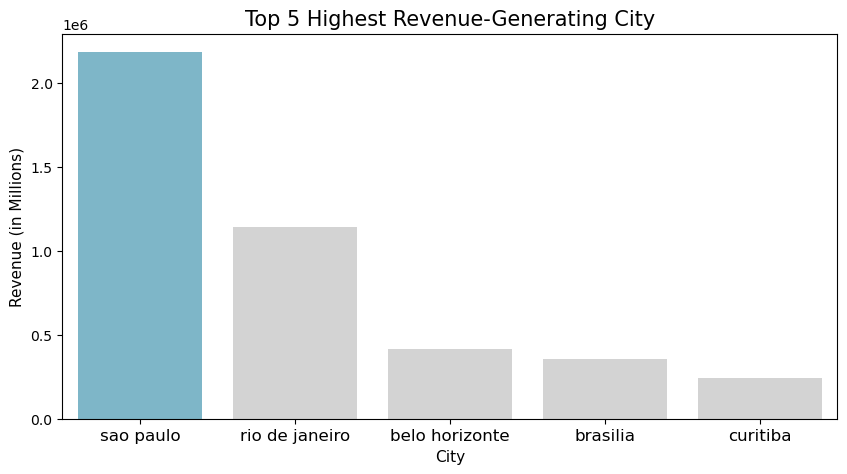

In [251]:
highest_city_revenue_df = all_df.groupby(by='customer_city').total_order_value.sum().reset_index()
highest_city_revenue_df.sort_values(by='total_order_value',ascending=False,inplace=True)

plt.figure(figsize=(10,5))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    y = "total_order_value",
    x = "customer_city",
    data =highest_city_revenue_df.head(5),
    palette = colors
)

plt.title("Top 5 Highest Revenue-Generating City", loc = "center", fontsize =15)
plt.ylabel("Revenue (in Millions)",fontsize =11)
plt.xlabel("City",fontsize=11)
plt.tick_params(axis ='x', labelsize =12)
plt.show()

### Pertanyaan 2: What is 5 Most Popular Product Category in those city?

In [252]:
def show_figures(city):
    lowercase_city = city.lower()
    customer_in_city_df = all_df[all_df.customer_city == lowercase_city]
    customer_in_city_df =customer_in_city_df.rename(columns={"product_category_name_english" : "category_name"})
    city_agg_df = customer_in_city_df.groupby(by="category_name").agg({
        'order_id' : 'nunique'
    },inplace=True).reset_index()

    city_agg_df.sort_values(by='order_id', ascending=False,inplace=True)
    titles = "5 Most Popular Products in " + city

    plt.figure(figsize=(10, 5))

    sns.barplot(
        y="category_name", 
        x="order_id",
        data=city_agg_df.head(5),
        palette=colors
    )
    plt.title(titles, loc="center", fontsize=15)
    plt.xlabel("Amount of Transaction", fontsize=12)
    plt.ylabel("Category", fontsize=12)
    plt.tick_params(axis='x', labelsize=12)
    plt.show()

C:\Users\tirta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tirta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tirta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


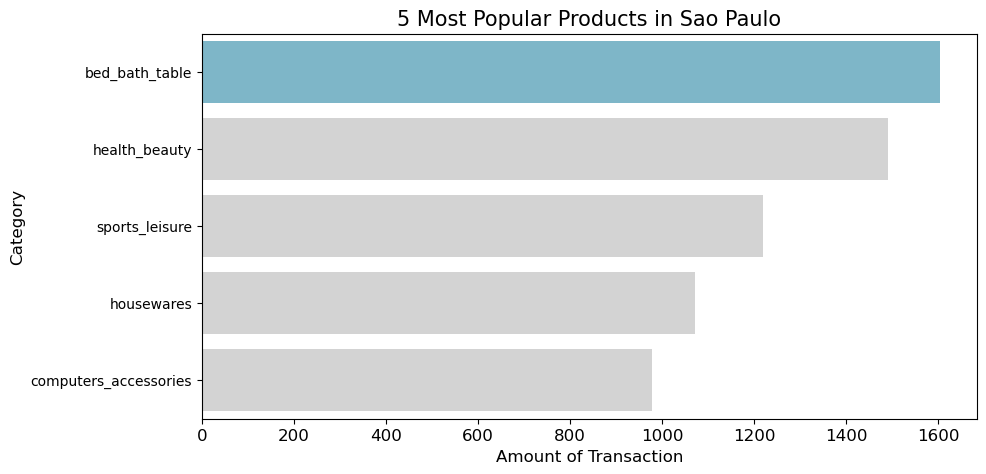

In [253]:
show_figures('Sao Paulo')

C:\Users\tirta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tirta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tirta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


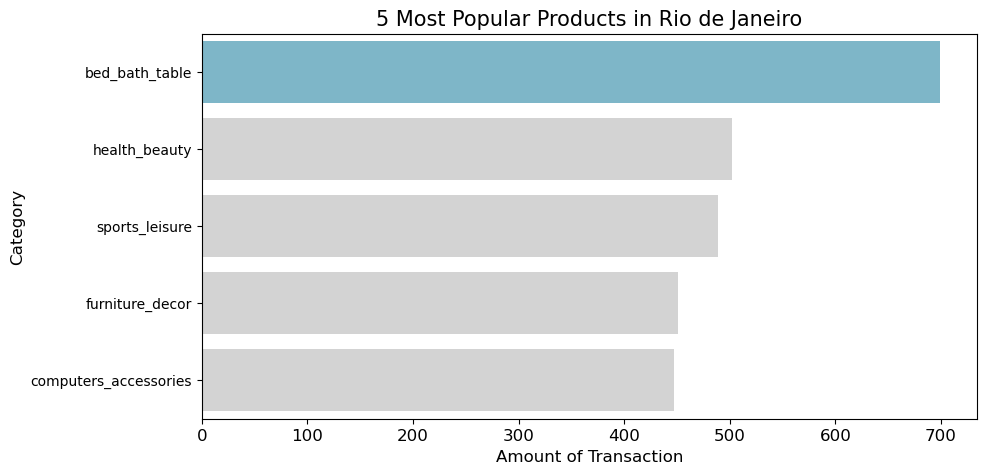

In [254]:
show_figures('Rio de Janeiro')

C:\Users\tirta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tirta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tirta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


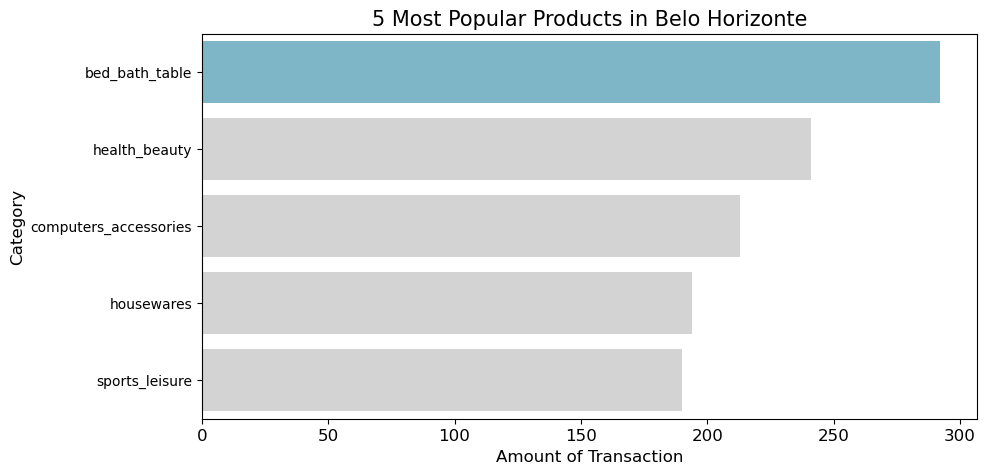

In [255]:
show_figures("Belo Horizonte")

C:\Users\tirta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tirta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tirta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


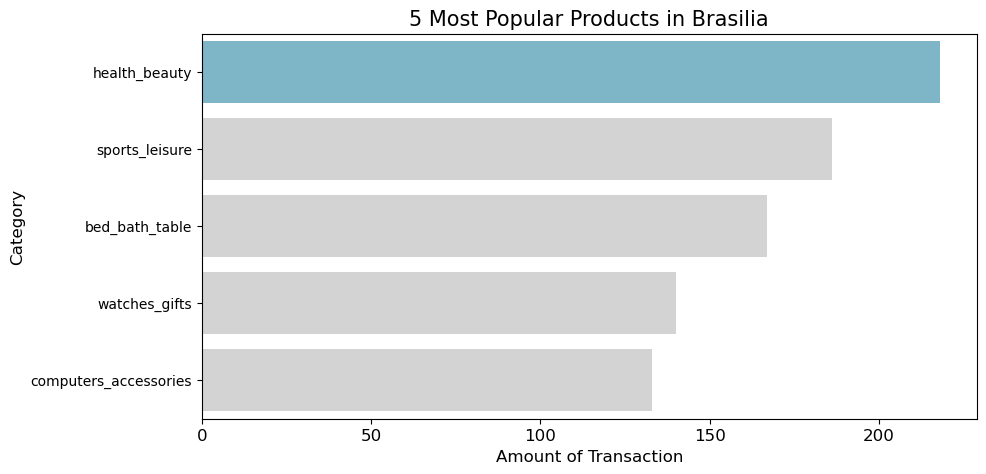

In [256]:
show_figures("Brasilia")

C:\Users\tirta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tirta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tirta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


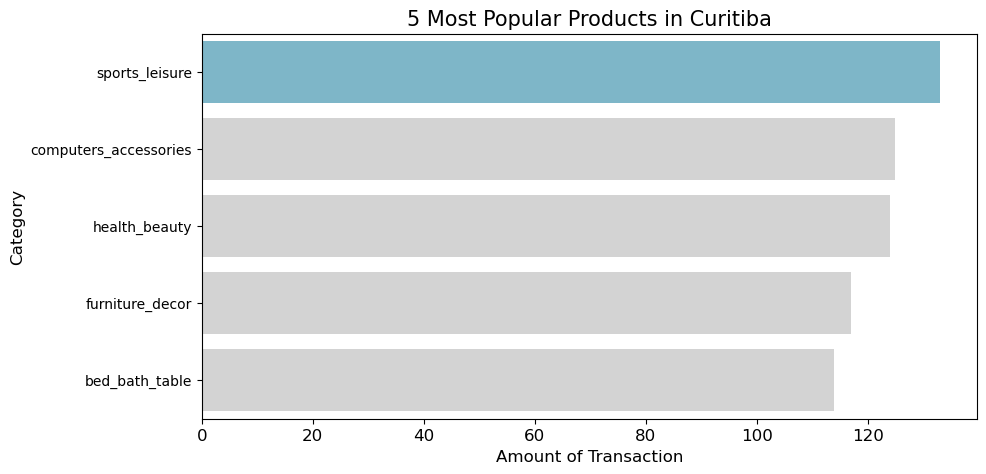

In [257]:
show_figures("Curitiba")

### Pertanyaan 3: What is the Frequencies of Order per Month?

In [258]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99269 entries, 0 to 99268
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99269 non-null  object        
 1   customer_id                    99269 non-null  object        
 2   order_status                   99269 non-null  object        
 3   order_purchase_timestamp       99269 non-null  datetime64[ns]
 4   order_approved_at              99269 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99269 non-null  datetime64[ns]
 6   order_delivered_customer_date  99269 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99269 non-null  datetime64[ns]
 8   customer_unique_id             99269 non-null  object        
 9   customer_zip_code_prefix       99269 non-null  int64         
 10  customer_city                  99269 non-null  object        
 11  customer_state 

In [259]:
transaction_df = all_df[["order_id","order_approved_at"]]
transaction_df

transaction_df = transaction_df.resample(rule ='M', on='order_approved_at').agg({
    'order_id' : 'nunique'
})
transaction_df.index = transaction_df.index.strftime("%Y-%m")
transaction_df.sort_values(by='order_approved_at', ascending=True,inplace=True)

transaction_df = transaction_df.rename(columns={
    'order_id' : 'order_count'
})
transaction_df

,order_count
order_approved_at,
2016-10,263
2016-11,0
2016-12,1
2017-01,704
2017-02,1592
2017-03,2501
2017-04,2215
2017-05,3468
2017-06,3090


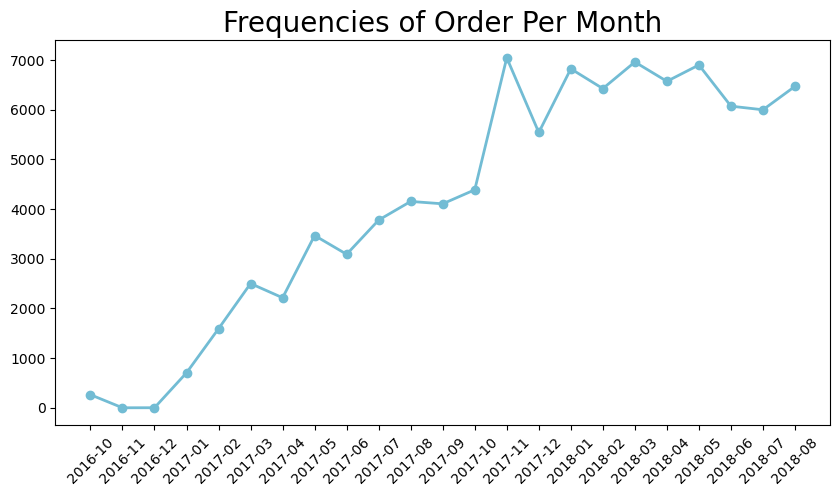

In [260]:
transaction_df =transaction_df.reset_index()
plt.figure(figsize=(10,5))
plt.plot(transaction_df['order_approved_at'],transaction_df['order_count'],marker ='o', linewidth =2, color = "#72BCD4")
plt.title("Frequencies of Order Per Month", loc='center', fontsize = 20)
plt.xticks(rotation =45,fontsize = 10)
plt.yticks(fontsize= 10)
plt.show()

In [261]:
rfm_df = all_df.groupby(by="customer_id", as_index = False).agg({
    "order_approved_at" : 'max', #Recency
    'order_id' : 'count', #Frequency
    'total_order_value' : 'sum' #Monetary
})

#Renaming Column 
rfm_df.rename(columns={
    'order_approved_at' : 'Recency',
    'order_id' : 'Frequency',
    'total_order_value' : 'Monetary'
},inplace=True)

#Making the customer_id easier to read on visualization
rfm_df['customer_unique_id'] = pd.factorize(rfm_df['customer_id'])[0]+1


#Counting the latest Transaction (in days format)
rfm_df['Recency'] = rfm_df['Recency'].dt.date
recent_date = order_df['order_purchase_timestamp'].dt.date.max() #Taking the last purchase recorded
rfm_df['Recency']= rfm_df['Recency'].apply(lambda x: (recent_date-x).days) #Counting days started from approved date to the last purchase recorded

#Taking only the top 10 so the proccess will go faster
top_recent = rfm_df.sort_values(by='Recency',ascending=True).head(5)
top_monetary = rfm_df.sort_values(by='Monetary',ascending=False).head(5)
top_freq = rfm_df.sort_values(by='Frequency',ascending=False).head(5)

C:\Users\tirta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tirta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tirta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tirta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

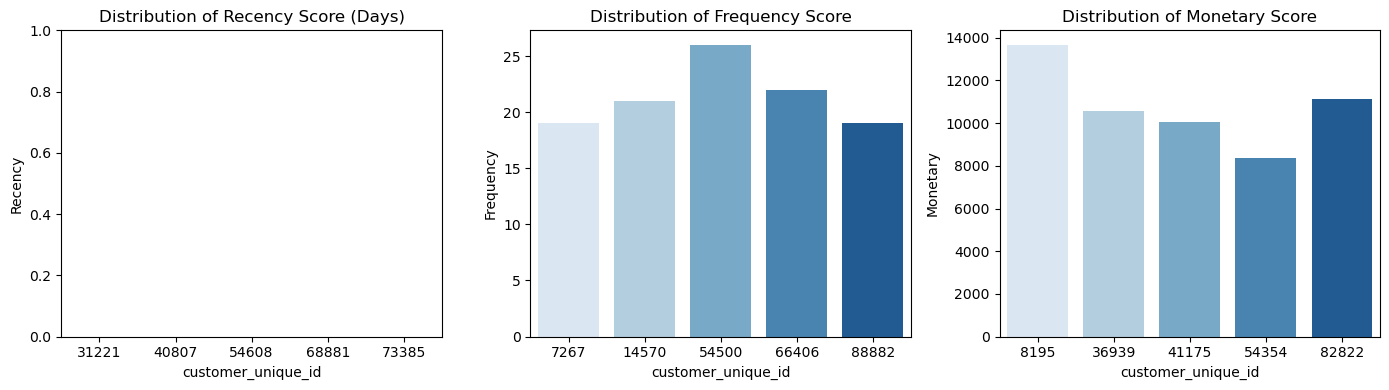

In [262]:

# Visualize the distribution of RFM Scores
plt.figure(figsize=(14, 4))

# Plot distribution of R Score
plt.subplot(1, 3, 1)
plt.ylim(0)
sns.barplot(y='Recency',x='customer_unique_id', data=top_recent, palette='Blues')
plt.title('Distribution of Recency Score (Days)')


# Plot distribution of F Score
plt.subplot(1, 3, 2)
sns.barplot(y='Frequency',x='customer_unique_id', data=top_freq, palette='Blues')
plt.title('Distribution of Frequency Score')

# Plot distribution of M Score
plt.subplot(1, 3, 3)
sns.barplot(y='Monetary',x='customer_unique_id', data=top_monetary, palette='Blues')
plt.title('Distribution of Monetary Score')

plt.tight_layout()
plt.show()

In our RFM Analysis we looked at customer transaction to figure out three important things:

1. Recency = When did the customer last buy? We found this by looking at the most recent date a customer's order was approved. Customers who bought something recently are more likely to buy again.

2. Frequency = How many times did the customer buy something? We counted the orders each customer made. Customers who buy more often are seen as more loyal.

3. Monetary = How much money did the customer spend in total? We added up all the money spent by each customer. Customers who spend more money are considered more valuable to the business.

We made each customer's ID shorter and easier to understand by giving each one a unique number. This helps us see the information better when we show it in graphs or charts.
Then, we worked out how long it's been since each customer's last purchase by counting the days from their last approved order to the most recent purchase in our data. This tells us which customers have been active recently.
Lastly, to make our analysis quicker and easy to understand, we only looked closely at the top 5 customers based on how recently they made a purchase, how much money they spent, and how many times they bought something. This helps us focus on the customers that matter most right now.

### Pertanyaan 3: Most Prefered Payment Method?

In [263]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99269 entries, 0 to 99268
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99269 non-null  object        
 1   customer_id                    99269 non-null  object        
 2   order_status                   99269 non-null  object        
 3   order_purchase_timestamp       99269 non-null  datetime64[ns]
 4   order_approved_at              99269 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99269 non-null  datetime64[ns]
 6   order_delivered_customer_date  99269 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99269 non-null  datetime64[ns]
 8   customer_unique_id             99269 non-null  object        
 9   customer_zip_code_prefix       99269 non-null  int64         
 10  customer_city                  99269 non-null  object        
 11  customer_state 

C:\Users\tirta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tirta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tirta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


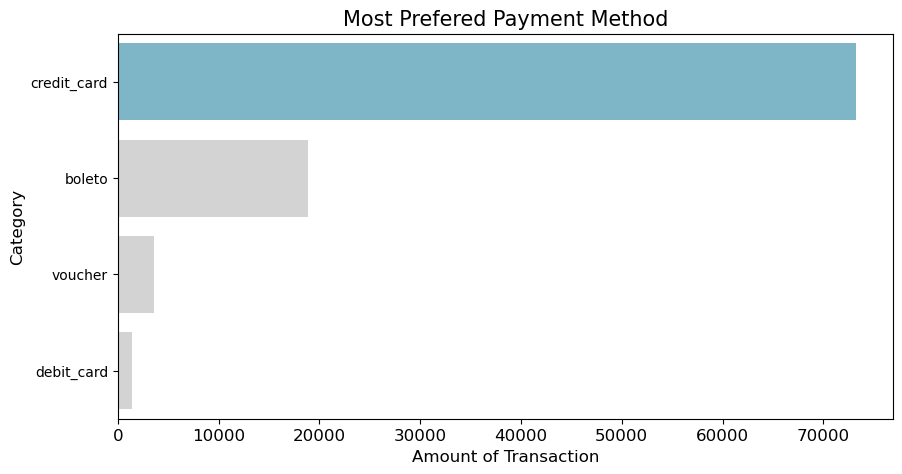

In [264]:
customers_payment_df = all_df[['payment_type','order_id','payment_installments']]
customers_payment_df =customers_payment_df .rename(columns={"product_category_name_english" : "category_name"})
customers_payment_agg_df = customers_payment_df .groupby(by="payment_type").agg({
    'order_id' : 'nunique'
},inplace=True).reset_index()

customers_payment_agg_df.sort_values(by='order_id', ascending=False,inplace=True)
titles = "Most Prefered Payment Method"

plt.figure(figsize=(10, 5))

sns.barplot(
    y="payment_type", 
    x="order_id",
    data=customers_payment_agg_df.head(5),
    palette=colors
)
plt.title(titles, loc="center", fontsize=15)
plt.xlabel("Amount of Transaction", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [265]:
customers_payment_df = customers_payment_df[customers_payment_df.payment_type == 'credit_card'] # Filtering only credit_card
customers_payment_df.groupby(by = "payment_installments").agg({
    'order_id' : 'nunique'
},inplace=True).sort_values(by= "order_id",ascending=False).reset_index()

,payment_installments,order_id
0,1,24331
1,2,11832
2,3,10002
3,4,6796
4,10,5089
5,5,5023
6,8,4076
7,6,3745
8,7,1536
9,9,613


## Conclusion

- Conclusion pertanyaan 1
  > From the graph above, we can conclude that the city of Sao Paulo generates the highest revenue among other cities, with more than 2 million Real in revenue. Followed by Rio de Janeiro, Belo Horizonte, Brasilia, and Curitiba in order
- Conclusion pertanyaan 2
  > From the graph above, we can conclude that : 
  > - In Sao Paulo
    bed_bath_table category is the most popular category with almost 1600 transaction, followed by health_beauty,sport_leisure, housewares, and computer_accessories.
    > - in Rio de Janeiro
    bed_bath_table is the most popular category with almost 700 transaction, followed by health_beauty, sport_leisure,furniture_decor, and computer_accessories.
    > - in Belo Horizonte
    the ranking starts with bed_bath_table, followed by health_beauty, computer_accessories, housewares, and sport_leisure.
    > - in Brasilia
    the most popular category is health_beauty, followed by sports_leisure, bed_bath_table, watches_gifts, and computers_accessories.
    > - in Curitiba
     sports_leisure is the most popular, followed by computers_accessories, health_beauty, furniture_decor, and bed_bath_table.
     
     
    > From this, we can see some of the most popular categories across these five cities, such as **bed_bath_table, health_beauty, and sport_leisure**.

- Conclusion pertanyaan 3
  > Based on the graph, we can observe a generally increasing trend in the number of orders over time. The graph starts in October 2016 with a relatively low number of orders and shows a steady increase, with some fluctuations, reaching a peak around March 2018. Following this peak, there's a slight dip and then the frequency of orders stabilizes at a level that is higher than when the data recording began. There's a particularly notable rise in the frequency of orders from mid-2017 to early 2018, indicating a period of significant growth. Overall, the graph suggests that the period under consideration saw an expansion in order activity, with the highest recorded number of orders occurring in March 2018.
- Conclusion pertanyaan 4
    >The chart illustrates that credit card is the most preferred method of payment, with the highest number of transactions, significantly outnumbering the other methods. The second most common payment method is boleto, followed by voucher and debit card, which have the fewest transactions. The preference for credit card payment is overwhelmingly dominant compared to the other options.

In [266]:
all_df.to_csv('Project_data.csv',index=False)